In [1]:
# Analytical Tools
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# General Utilities
import math
import json
import pprint
import itertools
import importlib

# Some settings
from IPython.display import Markdown, display
log = pprint.pprint
space = lambda: print()
printmd = lambda text: display(Markdown(text))
%matplotlib inline

def set_pandas_display_options() -> None:
    """Set pandas display options."""
    display = pd.options.display

    display.max_columns = 1000
    display.max_rows = 1000
    display.max_colwidth = 199
    display.width = 1000
    # display.precision = 2  # set as needed

set_pandas_display_options()

In [2]:
anagram = ['AALRYS',
						'AYKAWLJ',
						'AYUGHNT',
						'CLAIGER',
						'LUBMEJD',
						'AXPLINE']

solutions = 'salary|jaywalk|NAUGHTY|GLACIER|JUMBLED|EXPLAIN'

In [3]:
with open('pilot4.json') as json_file:
    data = json.load(json_file) 

Collect data in separate structures for non-insight (to check answers) and in 1 for anagram

In [4]:
black_anagram = []
black_anagram_ans = []
black_anagram_aha = []
black_anagram_rt = []

blue_anagram = []
blue_anagram_ans = []
blue_anagram_aha = []
blue_anagram_rt = []

num_subs = 0

for i in range(len(data)): #go thru the subjects
    if len(data[i]['data']) > 5: #only look at subjects that finished the task 
            num_subs = num_subs + 1            
            quiz_answer = data[i]['data'][3]['responses'] #get answer to quiz answer
            if '2 minutes' in quiz_answer:
                j = 3
            else:
                quiz_answer = data[i]['data'][5]['responses']
                if '2 minutes' in quiz_answer:
                    j = 5 
                else:
                    j = 7
            
            for k in range(2):
                color = data[i]['data'][j+1]['stimulus'] #which colored stimulus were they shown?
                if 'blue' in color:
                    blue_anagram.append(data[i]['data'][j+2]['blue_problems'][0])
                    rt = data[i]['data'][j+2]['rt']/1000
                    blue_anagram_rt.append(rt)
                    blue_anagram_ans.append(data[i]['data'][j+2]['responses'])
                    aha = int(data[i]['data'][j+4]['responses'][6])
                    blue_anagram_aha.append(aha)
                    j = j+4
                elif 'black' in color:
                    black_anagram.append(data[i]['data'][j+2]['black_problems'][0])
                    rt = data[i]['data'][j+2]['rt']/1000
                    black_anagram_rt.append(rt)
                    black_anagram_ans.append(data[i]['data'][j+2]['responses'])
                    aha = int(data[i]['data'][j+3]['responses'][6])
                    black_anagram_aha.append(aha)
                    j = j+3

print('we recruited ', num_subs, ' subjects')

we recruited  102  subjects


Convert data into df and do a filtering based on correct responses

In [40]:
d1 = {'anagrams':black_anagram,
     'answers':black_anagram_ans, 
     'rts': black_anagram_rt,
     'aha': black_anagram_aha}

d2 = {'anagrams':blue_anagram,
     'answers':blue_anagram_ans, 
     'rts': blue_anagram_rt,
     'aha': blue_anagram_aha}

df1 = pd.DataFrame(d1)
df2 = pd.DataFrame(d2)
df3 = df1.loc[(df1['answers'].str.contains(solutions, case = False)==True)]
df3 = df3[df3['rts'] < 21]
df3 = df3[df3['rts'] > 9]
df4 = df2.loc[(df2['answers'].str.contains(solutions, case = False)==False)] #don't include blue anagrams for which people got the correct answer

#df3_2 = df3[df3['rts'] < 70]

#df4 = df2[df2['rts'] > 20]

#df2_filtered = df2[df2['rts'] > 15000]

In [41]:
df1_a = df1.groupby(['anagrams']).agg(['median', 'std', 'count'])
df1_a

rts                     aha                
          median        std count median       std count
anagrams                                                
AALRYS    24.352  42.454392    12    3.0  2.234373    12
AXPLINE   36.087  39.941673    23    4.0  2.210289    23
AYKAWLJ   18.230  33.994830    17    4.0  1.968502    17
AYUGHNT    9.568  27.235004    21    5.0  2.286607    21
CLAIGER   21.067  47.689955    16    3.5  2.604483    16
LUBMEJD   25.079  36.772168    13    4.0  2.047513    13

In [42]:
print(len(df3), len(df4))
print(df3['aha'].mean(), df4['aha'].mean())
print(df3['rts'].mean(), df3['rts'].std(), df4['rts'].mean(), df4['rts'].std())

36 60
4.333333333333333 1.75
14.418111111111111 3.346600089453498 14.195000000000002 3.23440620385341


In [43]:
dft3 = df3.groupby(['anagrams']).agg(['median', 'std', 'count'])
dft4 = df4.groupby(['anagrams']).agg(['mean', 'std', 'count'])
dft3

rts                    aha                
           median       std count median       std count
anagrams                                                
AALRYS    10.8710  3.948794     3    4.0  1.527525     3
AXPLINE   15.7445  2.080774     4    4.5  2.380476     4
AYKAWLJ   16.3490  3.124428    11    5.0  1.439697    11
AYUGHNT   14.3560  3.478178     9    6.0  1.763834     9
CLAIGER   14.6320  3.398558     5    5.0  2.190890     5
LUBMEJD   12.8935  3.120781     4    4.5  0.957427     4

Plot it!

/Users/rachitdubey/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/rachitdubey/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


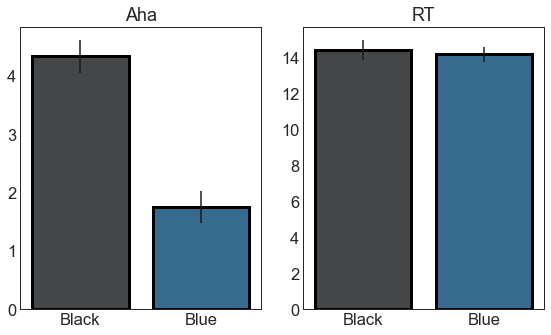

In [14]:
import seaborn as sns
sns.set(style="white", font_scale=1.5, rc={'figure.figsize':(8,5), 
                                              "grid.linewidth": 1, "axes.linewidth": 1, 'patch.linewidth': 3.0})

color = ['#454648', '#276d9d']
plt.subplot(1, 2, 1)
ax = sns.barplot(np.arange(2), [df3['aha'].mean(), df4['aha'].mean()]
                 , yerr=[df3['aha'].sem(), df4['aha'].sem()], 
                 palette = color, edgecolor = 'black')
plt.xticks(np.arange(2), ['Black','Blue'])
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.title('Aha')

plt.subplot(1, 2, 2)
ax = sns.barplot(np.arange(2), [df3['rts'].mean(), df4['rts'].mean()]
                 , yerr=[df3['rts'].sem(), df4['rts'].sem()], 
                 palette = color, edgecolor = 'black')
plt.xticks(np.arange(2), ['Black','Blue'])
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.title('RT')

plt.tight_layout()
plt.show()

(array([ 2.,  3.,  2.,  3.,  0.,  5.,  2.,  0.,  3.,  2.,  1.,  3.,  2.,
         5.,  2.,  1.,  3.,  1.,  2., 59.]),
 array([ 3.695  ,  4.53195,  5.3689 ,  6.20585,  7.0428 ,  7.87975,
         8.7167 ,  9.55365, 10.3906 , 11.22755, 12.0645 , 12.90145,
        13.7384 , 14.57535, 15.4123 , 16.24925, 17.0862 , 17.92315,
        18.7601 , 19.59705, 20.434  ]),
 <BarContainer object of 20 artists>)

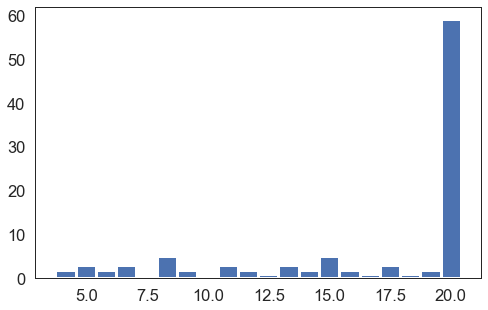

In [24]:
plt.hist(df2['rts'], 20)

Anagram analysis

Analyze only those responses for which people's confidence is greater than 5

Plot distribution of curiosity ratings below